## Explainable Techniques  (PDP, ICE, ALE)
This notebook conducts a comprehensive data analysis focused on air quality across various U.S. cities. The primary objective is to apply a combination of interpretable machine learning models and explainability techniques to develop best practices in the fields of artificial intelligence (AI) and machine learning (ML). By leveraging transparent models and post-hoc explainability methods, we aim to derive actionable insights from the data while ensuring that the decision-making processes remain understandable and interpretable for stakeholders. This approach aligns with the growing emphasis on responsible AI, which prioritizes model transparency, fairness, and accountability in real-world applications.

**Author:** Lennox Anderson

**Dataset:** Urban Air Quality and Health Impact Dataset: A Comprehensive Overview of U.S. Cities 

**License:** MIT

**Source:** https://www.kaggle.com/datasets/abdullah0a/urban-air-quality-and-health-impact-dataset

[![Open In Collab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/drive/16fXvzDBU-Y5Xon9JxbkPWFt4nOhItlga?usp=sharing)

---

### Dependencies

In [3]:
!pip install scikit-learn matplotlib seaborn pdpbox alibi
!pip install pdpbox --upgrade

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_squared_error
from sklearn.impute import SimpleImputer
from sklearn.inspection import PartialDependenceDisplay
from sklearn.inspection import partial_dependence

### EDA

In [6]:
# load dataset
df = pd.read_csv('/Users/lennox/Documents/machineLearning/data/Urban Air Quality and Health Impact Dataset.csv')

In [7]:
# view first 5 rows
df.head()

,datetime,datetimeEpoch,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,...,City,Temp_Range,Heat_Index,Severity_Score,Condition_Code,Month,Season,Day_of_Week,Is_Weekend,Health_Risk_Score
0,2024-09-07,1.725692e+09,106.1,91.0,98.5,104.0,88.1,95.9,51.5,21.0,...,Phoenix,15.1,95.918703,4.4300,NaN,9.0,Fall,Saturday,True,10.522170
1,2024-09-08,1.725779e+09,103.9,87.0,95.4,100.5,84.7,92.3,48.7,21.5,...,Phoenix,16.9,92.281316,3.8800,0.0,9.0,Fall,Sunday,True,10.062332
2,2024-09-09,1.725865e+09,105.0,83.9,94.7,99.9,81.6,90.6,41.7,16.9,...,Phoenix,21.1,90.599165,3.6300,0.0,9.0,Fall,Monday,False,9.673387
3,2024-09-10,1.725952e+09,106.1,81.2,93.9,100.6,79.5,89.8,39.1,15.7,...,Phoenix,24.9,89.638811,2.8512,0.0,9.0,Fall,Tuesday,False,9.411519
4,2024-09-11,1.726038e+09,106.1,82.1,94.0,101.0,80.0,90.0,40.1,15.9,...,Phoenix,24.0,89.760414,3.3908,0.0,9.0,Fall,Wednesday,False,9.515179


In [8]:
# get columns and types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 46 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   datetime           1000 non-null   object 
 1   datetimeEpoch      1000 non-null   float64
 2   tempmax            1000 non-null   float64
 3   tempmin            1000 non-null   float64
 4   temp               1000 non-null   float64
 5   feelslikemax       1000 non-null   float64
 6   feelslikemin       1000 non-null   float64
 7   feelslike          1000 non-null   float64
 8   dew                1000 non-null   float64
 9   humidity           1000 non-null   float64
 10  precip             1000 non-null   float64
 11  precipprob         1000 non-null   float64
 12  precipcover        1000 non-null   float64
 13  preciptype         378 non-null    object 
 14  snow               1000 non-null   float64
 15  snowdepth          929 non-null    float64
 16  windgust           1000 n

In [9]:
# get null values
df.isnull().sum()

datetime               0
datetimeEpoch          0
tempmax                0
tempmin                0
temp                   0
feelslikemax           0
feelslikemin           0
feelslike              0
dew                    0
humidity               0
precip                 0
precipprob             0
precipcover            0
preciptype           622
snow                   0
snowdepth             71
windgust               0
windspeed              0
winddir                0
pressure               0
cloudcover             0
visibility             0
solarradiation         0
solarenergy            0
uvindex                0
severerisk             0
sunrise                0
sunriseEpoch           0
sunset                 0
sunsetEpoch            0
moonphase              0
conditions             0
description            0
icon                   0
stations             933
source                 0
City                   0
Temp_Range             0
Heat_Index             0
Severity_Score         0


In [10]:
# create new df that will be modified with new changes
cleaned_df = df.copy()
# fill null values with none
cleaned_df['preciptype'] = cleaned_df['preciptype'].fillna('None')

In [11]:
# assume that values are 0 because all snow values are 0.0
cleaned_df['snowdepth'] = cleaned_df['snowdepth'].fillna(0)

In [12]:
# set null to unknown
cleaned_df['stations'] = cleaned_df['stations'].fillna('Unknown')

In [13]:
# set null to unknown
cleaned_df['Condition_Code'] = cleaned_df['Condition_Code'].fillna('Unknown')

In [14]:
cleaned_df.isnull().sum()

datetime             0
datetimeEpoch        0
tempmax              0
tempmin              0
temp                 0
feelslikemax         0
feelslikemin         0
feelslike            0
dew                  0
humidity             0
precip               0
precipprob           0
precipcover          0
preciptype           0
snow                 0
snowdepth            0
windgust             0
windspeed            0
winddir              0
pressure             0
cloudcover           0
visibility           0
solarradiation       0
solarenergy          0
uvindex              0
severerisk           0
sunrise              0
sunriseEpoch         0
sunset               0
sunsetEpoch          0
moonphase            0
conditions           0
description          0
icon                 0
stations             0
source               0
City                 0
Temp_Range           0
Heat_Index           0
Severity_Score       0
Condition_Code       0
Month                0
Season               0
Day_of_Week

In [15]:
# after further analysis, the snow columns all equal 0 so drop them
cleaned_df = cleaned_df.drop(columns=['snowdepth', 'snow'])

In [16]:
# get standard stats for each column
display(df.describe())

,datetimeEpoch,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,precip,...,severerisk,sunriseEpoch,sunsetEpoch,moonphase,Temp_Range,Heat_Index,Severity_Score,Condition_Code,Month,Health_Risk_Score
count,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.000000,1.000000e+03,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,569.0,1000.0,1000.000000
mean,1.726284e+09,85.106961,68.641638,76.115967,85.195384,68.547548,76.323286,57.267120,56.782281,0.032135,...,12.923695,1.726309e+09,1.726353e+09,0.383811,16.469899,80.195613,3.057743,0.0,9.0,9.729103
std,3.745834e+05,9.524231,8.474102,8.722070,9.496951,8.365809,8.621361,9.161517,16.708667,0.083461,...,8.838858,3.753453e+05,3.753012e+05,0.147229,5.552785,6.053805,0.624024,0.0,0.0,0.679728
min,1.725624e+09,62.035432,49.108218,55.548415,62.206413,48.834041,57.748822,26.261814,11.752135,-0.021213,...,7.507579,1.725668e+09,1.725686e+09,0.123494,1.676587,65.511677,1.578048,0.0,9.0,8.492431
25%,1.725948e+09,78.661118,62.678245,69.102499,78.485332,62.734961,68.930104,51.229378,49.982029,-0.000511,...,9.705341,1.725976e+09,1.726021e+09,0.247940,13.319119,76.287207,2.583375,0.0,9.0,9.195244
50%,1.726285e+09,84.322847,67.702405,75.222751,84.284077,67.844544,75.544961,58.598490,58.486182,0.004000,...,10.080919,1.726312e+09,1.726352e+09,0.385185,16.694710,78.562345,3.026242,0.0,9.0,9.546156
75%,1.726616e+09,91.653987,75.585109,82.396698,93.757026,75.591093,84.309449,62.738294,66.560400,0.015258,...,10.860683,1.726642e+09,1.726687e+09,0.516248,20.734495,85.318985,3.507127,0.0,9.0,10.242523
max,1.727021e+09,107.797400,91.635546,99.851684,105.060170,89.369854,98.193984,76.648668,92.459293,0.471666,...,61.727919,1.726991e+09,1.727027e+09,0.649488,29.790757,96.684162,5.158112,0.0,9.0,11.485725


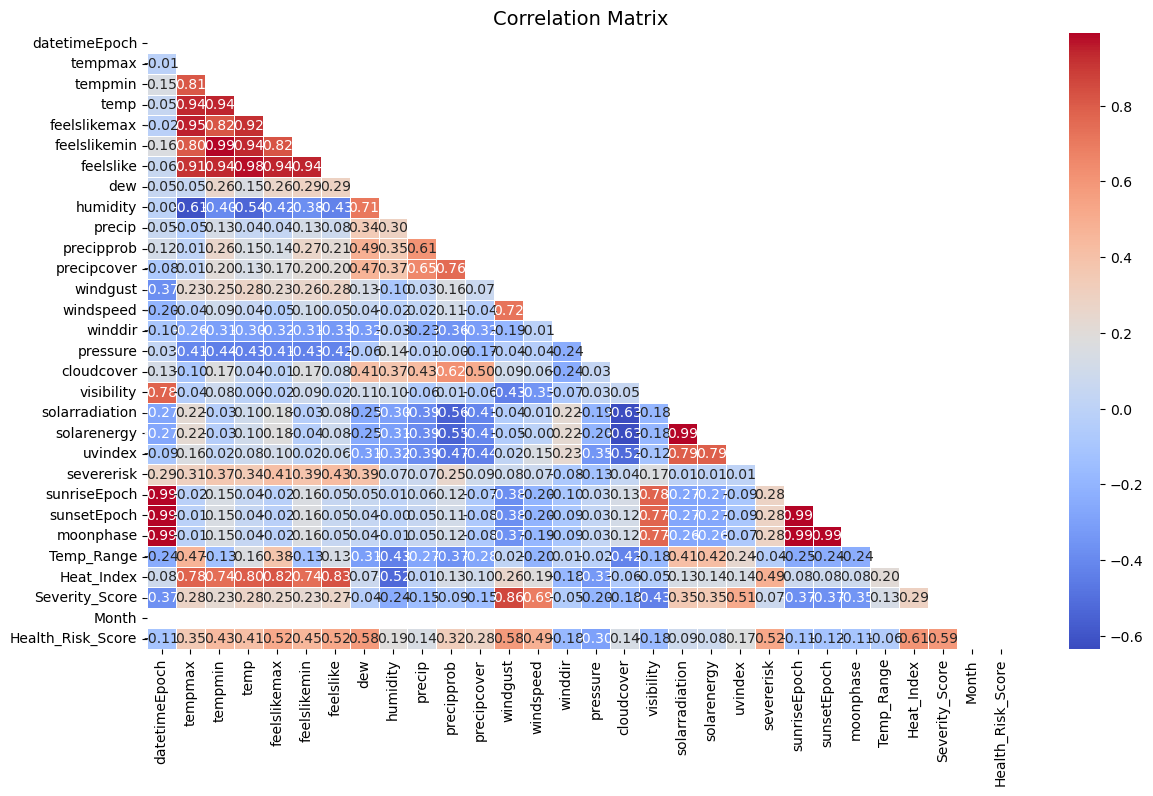

In [17]:
# include numeric columns
numeric_df = cleaned_df.select_dtypes(include=[np.number])
# get cm
corr_matrix = numeric_df.corr()

# mask and plot
plt.figure(figsize=(14, 8))
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
plt.title("Correlation Matrix", fontsize=14)
sns.heatmap(corr_matrix, mask=mask, annot=True, cmap='coolwarm', linewidths=0.5, fmt=".2f")
plt.show()

### Decision Tree for High Interpretability

In this context, we leverage decision trees to:

- Identify key features that drive important decisions.
- Simplify complex datasets into understandable rules.
- Provide transparency in the decision-making process, making it easier for stakeholders to trust and validate model outcomes.

Decision trees are particularly valuable when model transparency and feature importance are crucial for the task at hand, such as in regulatory, ethical, or safety-critical applications.

---

In [19]:
# define the target and features for modeling (predicting health_risk_score)
target = 'Health_Risk_Score'
features = [
    'tempmax', 'tempmin', 'feelslike', 'dew', 'humidity', 'precip', 'precipprob',
    'precipcover', 'windgust', 'windspeed', 'pressure', 'cloudcover',
    'visibility', 'solarradiation', 'solarenergy', 'uvindex', 'Severity_Score', 'Temp_Range'
]

# encode categorical features
categorical_features = ['City', 'Season', 'Condition_Code']

# convert categorical columns to string
cleaned_df['City'] = cleaned_df['City'].astype(str)
cleaned_df['Season'] = cleaned_df['Season'].astype(str)
cleaned_df['Condition_Code'] = cleaned_df['Condition_Code'].astype(str)

# use onehotencoder
encoder = OneHotEncoder(sparse_output=False, drop='first')
encoded_categorical = encoder.fit_transform(cleaned_df[categorical_features])

# combine numerical and encoded categorical 
X = np.hstack([cleaned_df[features].values, encoded_categorical])
y = cleaned_df[target]

# split and train using decision tree
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
num_imputer = SimpleImputer(strategy="median")
X_train = num_imputer.fit_transform(X_train)
X_test = num_imputer.transform(X_test)
dt_model = DecisionTreeRegressor(max_depth=5, random_state=42)
dt_model.fit(X_train, y_train)

# get pred
y_pred_train = dt_model.predict(X_train)
y_pred_test = dt_model.predict(X_test)

# cget rmse
rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))

print(f"train rmse: {rmse_train}")
print(f"test rmse: {rmse_test}")

train rmse: 0.16991446288173445
test rmse: 0.19422896721534974


[ 3  8  0 16  2  4 18  1 15  6 17 14  9 11 10  5  7 27 12 26 19 20 21 22
 23 24 25 13]


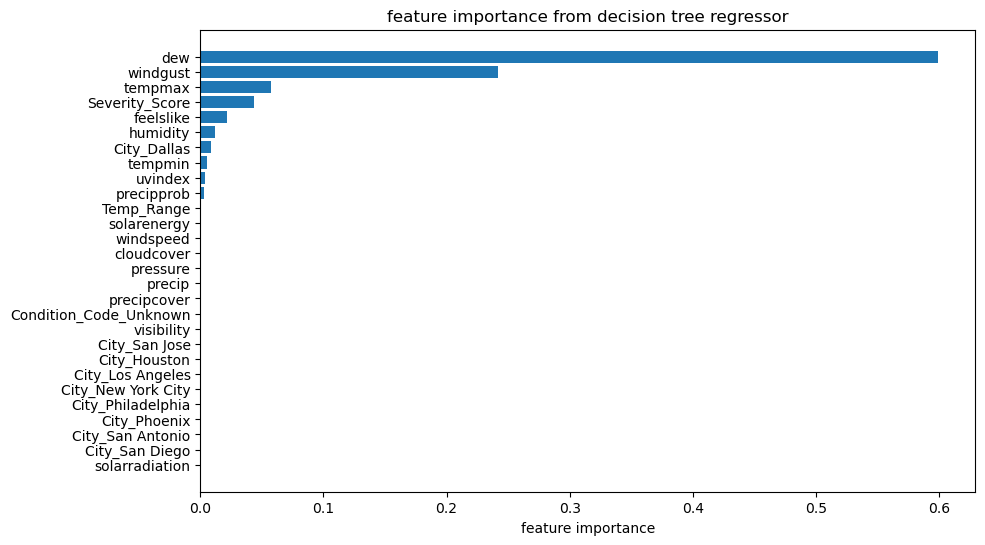

In [20]:
# combine numerical feature names and one-hot encoded categorical feature names
feature_names = features + list(encoder.get_feature_names_out(categorical_features))

# get feature importance from the trained decision tree model
importance = dt_model.feature_importances_

# create a sorted list of feature importance
sorted_idx = np.argsort(importance)[::-1]
print(sorted_idx)

# plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(range(len(sorted_idx)), importance[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), [feature_names[i] for i in sorted_idx])
plt.xlabel('feature importance')
plt.title('feature importance from decision tree regressor')
plt.gca().invert_yaxis()
plt.show()

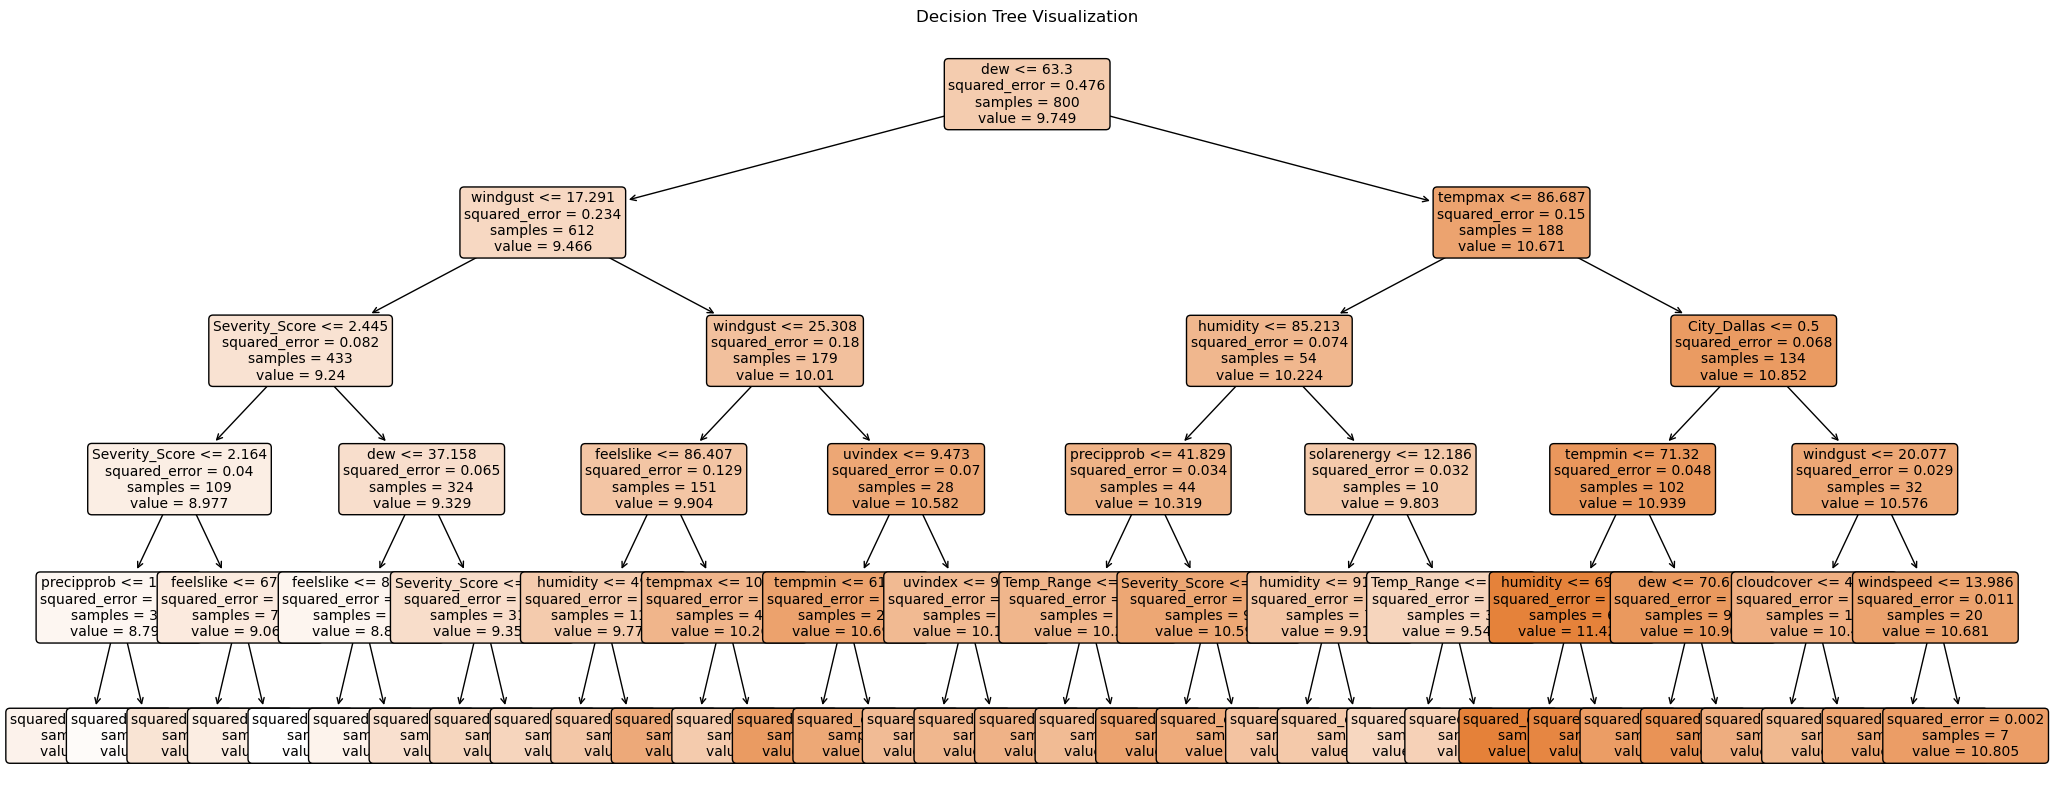

In [21]:
from sklearn import tree
import matplotlib.pyplot as plt

# plot the decision tree
plt.figure(figsize=(25, 10))
tree.plot_tree(dt_model, feature_names=feature_names, filled=True, rounded=True, fontsize=10)
plt.title('Decision Tree Visualization')
plt.show()

---

### Explainability using PDP, ICE, and ALE

In this section, we explore Partial Dependence Plots (PDP), Individual Conditional Expectation (ICE), and Accumulated Local Effects (ALE) as explainability methods to understand the impact of an important feature found using a decision tree model.

- **PDP** helps visualize the average effect of a feature on the prediction, showing how the predicted outcome changes as the feature value varies.
- **ICE** extends PDP by plotting individual prediction lines, offering insight into how the feature affects individual instances.
- **ALE** corrects for potential feature correlation bias, offering a more robust interpretation of local feature effects on predictions.

By using these methods, we gain a deeper understanding of how this key feature influences model behavior, providing transparent and interpretable insights into the decision-making process.

---

In [24]:
# from graph above we decide to only explain the important features
important_features = ['dew', 'windgust', 'tempmax', 'Severity_Score', 'feelslike', 'humidity']

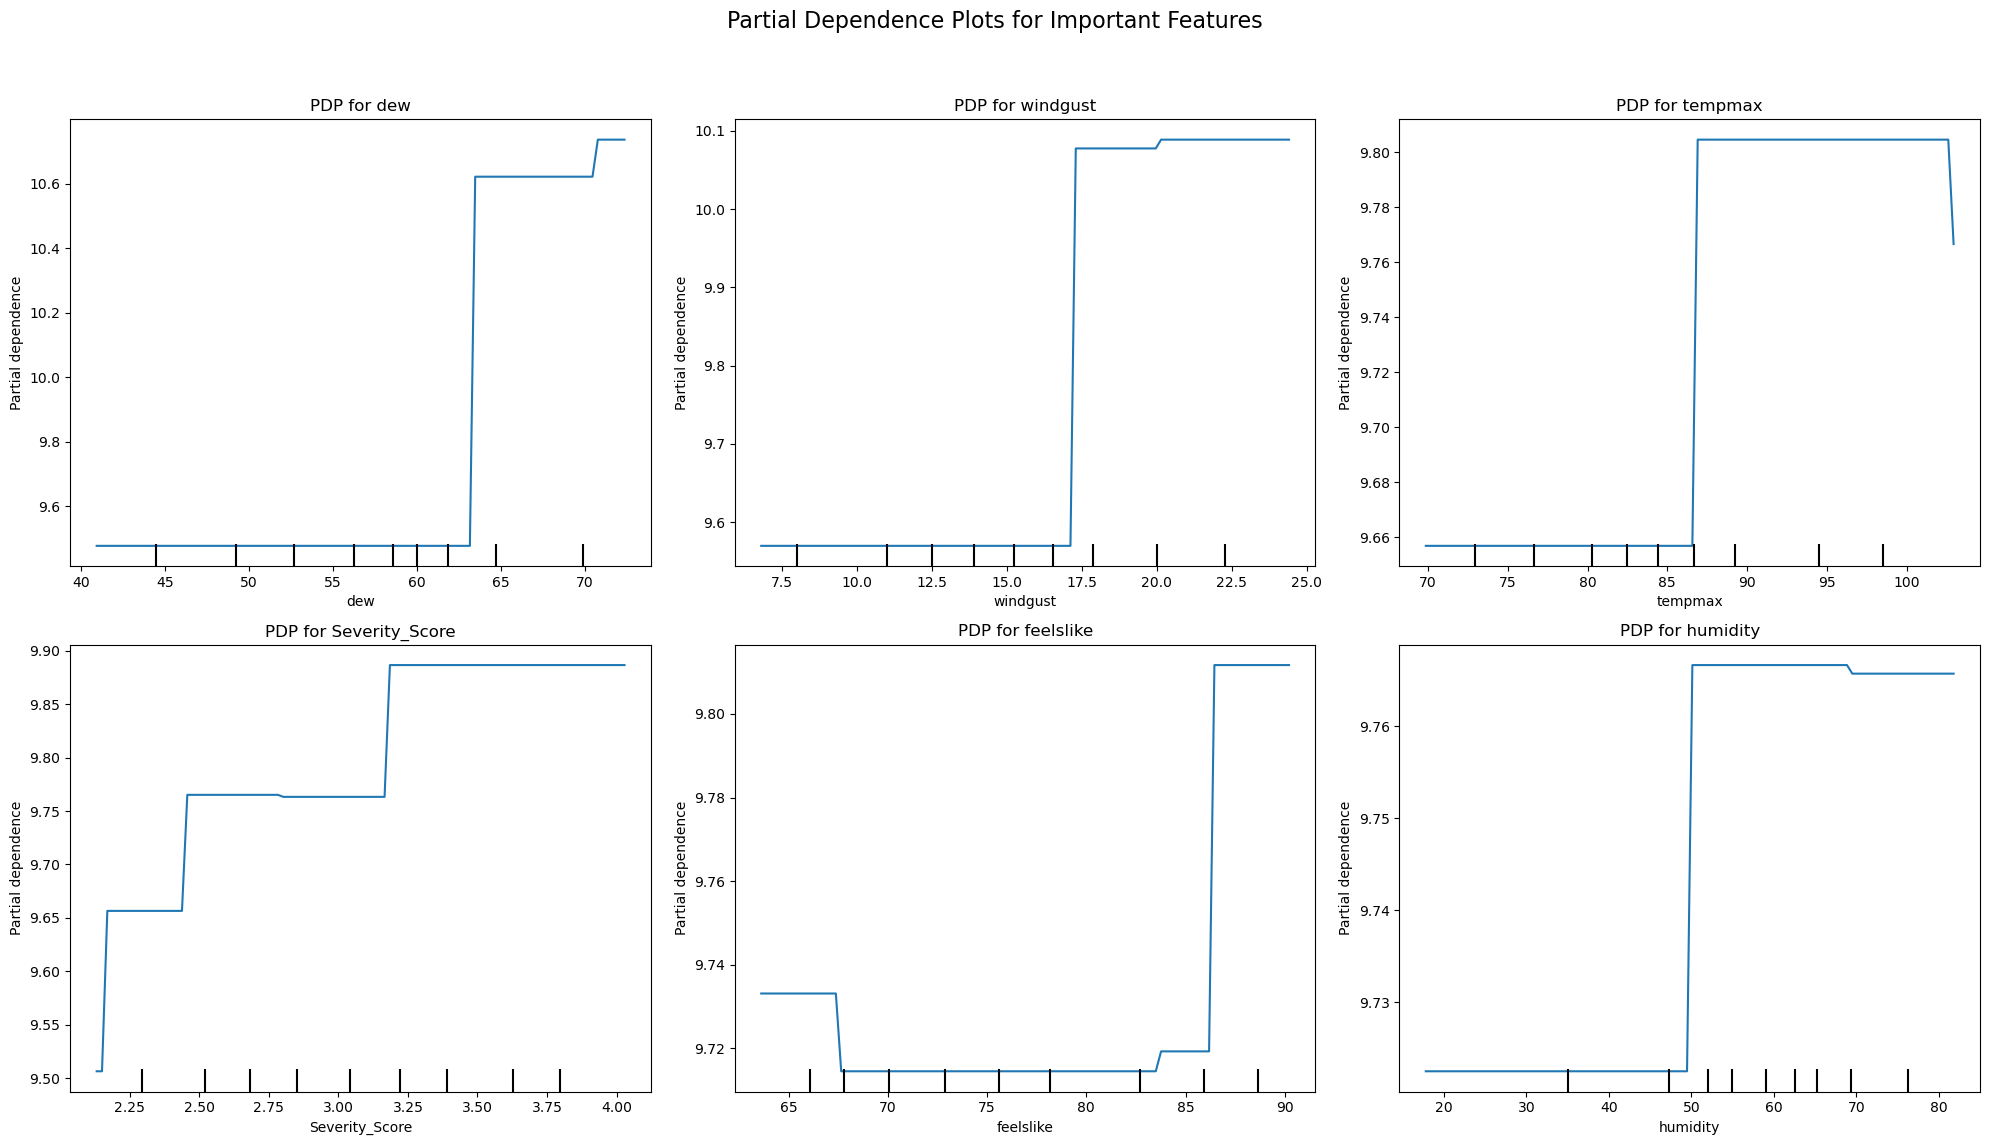

In [25]:
def plot_pdp_grid(model, X, features, feature_names):
    # determine the number of features to plot
    n_features = len(features)
    # set number of columns in the grid
    n_cols = 3
    # calculate number of rows needed
    n_rows = (n_features - 1) // n_cols + 1
    # create a figure and axes for the grid
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 6*n_rows))
    fig.suptitle("Partial Dependence Plots for Important Features", fontsize=16)
    
    # iterate over each feature
    for i, feature in enumerate(features):
        # calculate the row and column for the current subplot
        row = i // n_cols
        col = i % n_cols
        # get the correct axis for the current subplot
        ax = axes[row, col] if n_rows > 1 else axes[col]
        
        # get the index of the current feature
        feature_idx = feature_names.index(feature)
        # create and plot the partial dependence plot
        PartialDependenceDisplay.from_estimator(
            model, X, [feature_idx], 
            feature_names=feature_names,
            ax=ax
        )
        # set the title 
        ax.set_title(f"PDP for {feature}")
    
    # remove any extra subplots
    for i in range(n_features, n_rows * n_cols):
        # calculate row and column of extra subplot
        row = i // n_cols
        col = i % n_cols
        # remove 
        fig.delaxes(axes[row, col] if n_rows > 1 else axes[col])
    
    # adjust the layout and display the plot
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

# call the function to create the pdp grid
plot_pdp_grid(dt_model, X_train, important_features, features)

### Summary of Partial Dependence Plots for Important Features

**PDP for Dew**
The above plot shows a sharp increase in the predicted value when dew point reaches around 60, ultimatly showing a significant impact on the health risk score above this threshold.

**PDP for Windgust**
There is a notable jump in the predicted value at wind gust speeds of around 15, indicating that higher wind gusts are associated with increased health risk scores.

**PDP for Max Tempature**
The maximum temperature appears to have a relatively constant effect on the health risk score until it reaches about 95, where there's a slight decrease.

**PDP for Severity Score**
The Severity Score shows a stepped increase in its effect on the health risk score, with notable jumps at scores of about 2.25 and 3.0.

**PDP for Feels Like**
The "feels like" temperature demonstrates a complex relationship with the health risk score, with a significant spike around 85-90 degrees.

**PDP for Humidity**
Humidity appears to have a minimal effect on the health risk score until it reaches about 60%, after which there's a slight increase in the predicted value.

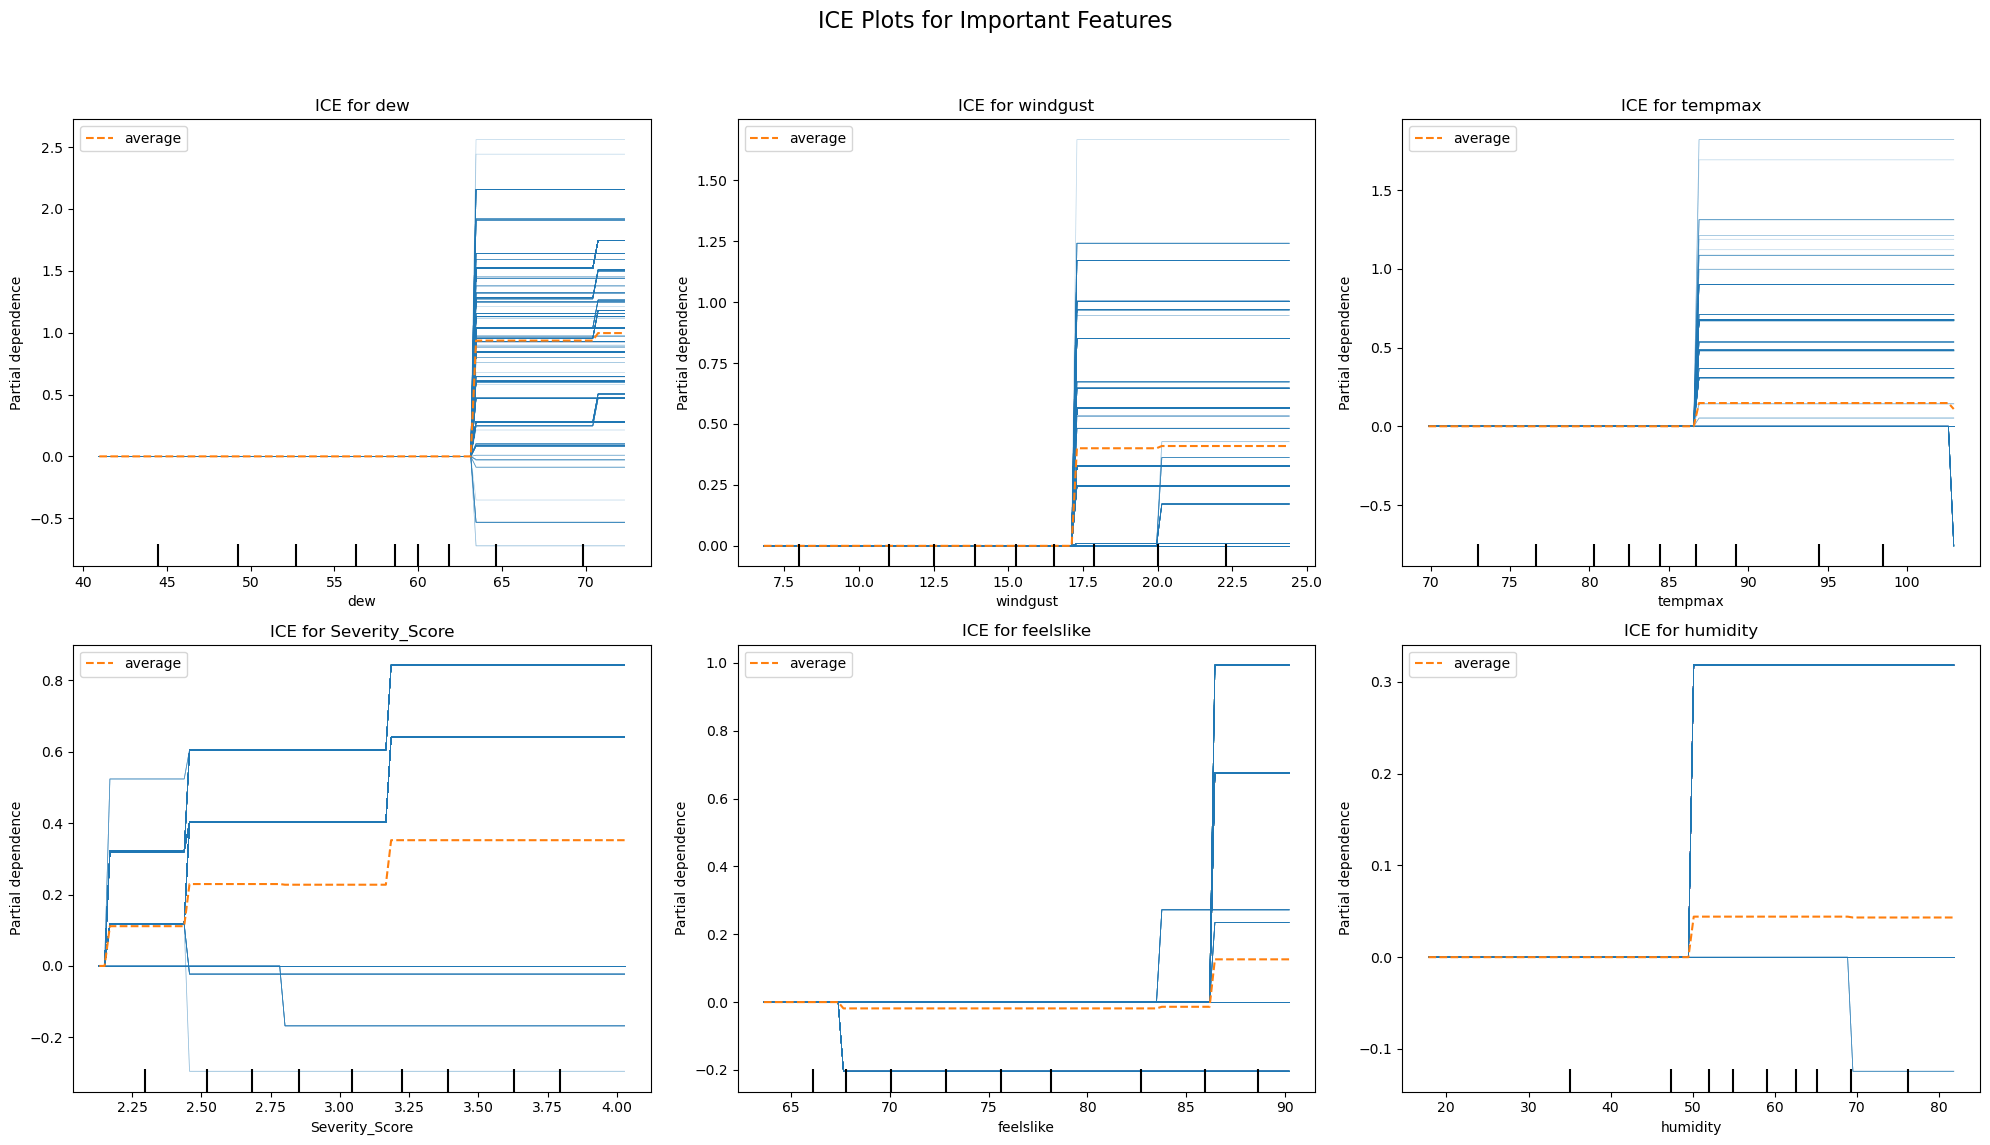

In [28]:
def plot_ice_grid(model, X, features, feature_names):
    n_features = len(features)
    n_cols = 3
    n_rows = (n_features - 1) // n_cols + 1
    
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 6*n_rows))
    fig.suptitle("ICE Plots for Important Features", fontsize=16)
    
    for i, feature in enumerate(features):
        row = i // n_cols
        col = i % n_cols
        ax = axes[row, col] if n_rows > 1 else axes[col]
        
        feature_idx = feature_names.index(feature)
        PartialDependenceDisplay.from_estimator(
            model, X, [feature_idx], 
            kind="both",
            centered=True,
            feature_names=feature_names,
            ax=ax
        )
        ax.set_title(f"ICE for {feature}")
    
    # Remove extra subplots
    for i in range(n_features, n_rows * n_cols):
        row = i // n_cols
        col = i % n_cols
        fig.delaxes(axes[row, col] if n_rows > 1 else axes[col])
    
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

plot_ice_grid(dt_model, X_train, important_features, features)

### Summary of ICE Plots for Important Features

**ICE for Dew**
The plot shows a wide range of individual effects with a sharp increase around 60-65, indicating that dew point has a varied but generally positive impact on health risk scores above this threshold.

**ICE for Windgust**
There's a consistent jump in individual predictions at wind gust speeds of about 15, suggesting that higher wind gusts universally increase health risk scores.

**ICE for Max Tempature**
The maximum temperature shows relatively constant effects for most instances until about 95, where there's a slight divergence in individual predictions.

**ICE for Severity Score**
The Severity Score demonstrates stepped increases in its effect on individual health risk scores, with notable jumps and divergences at scores of about 2.25 and 3.0.

**ICE for Feels Like**
The "feels like" temperature exhibits a complex relationship with health risk scores, showing a significant spike and divergence in individual effects around 85-90 degrees.

**ICE for Humidity**
Humidity appears to have minimal effect on most individual predictions until about 50-60%, after which there's a slight increase and some divergence in the predicted values.

Shape of X: (800, 28)
Number of features to plot: 6
Number of feature names: 18
Valid features: ['dew', 'windgust', 'tempmax', 'Severity_Score', 'feelslike', 'humidity']


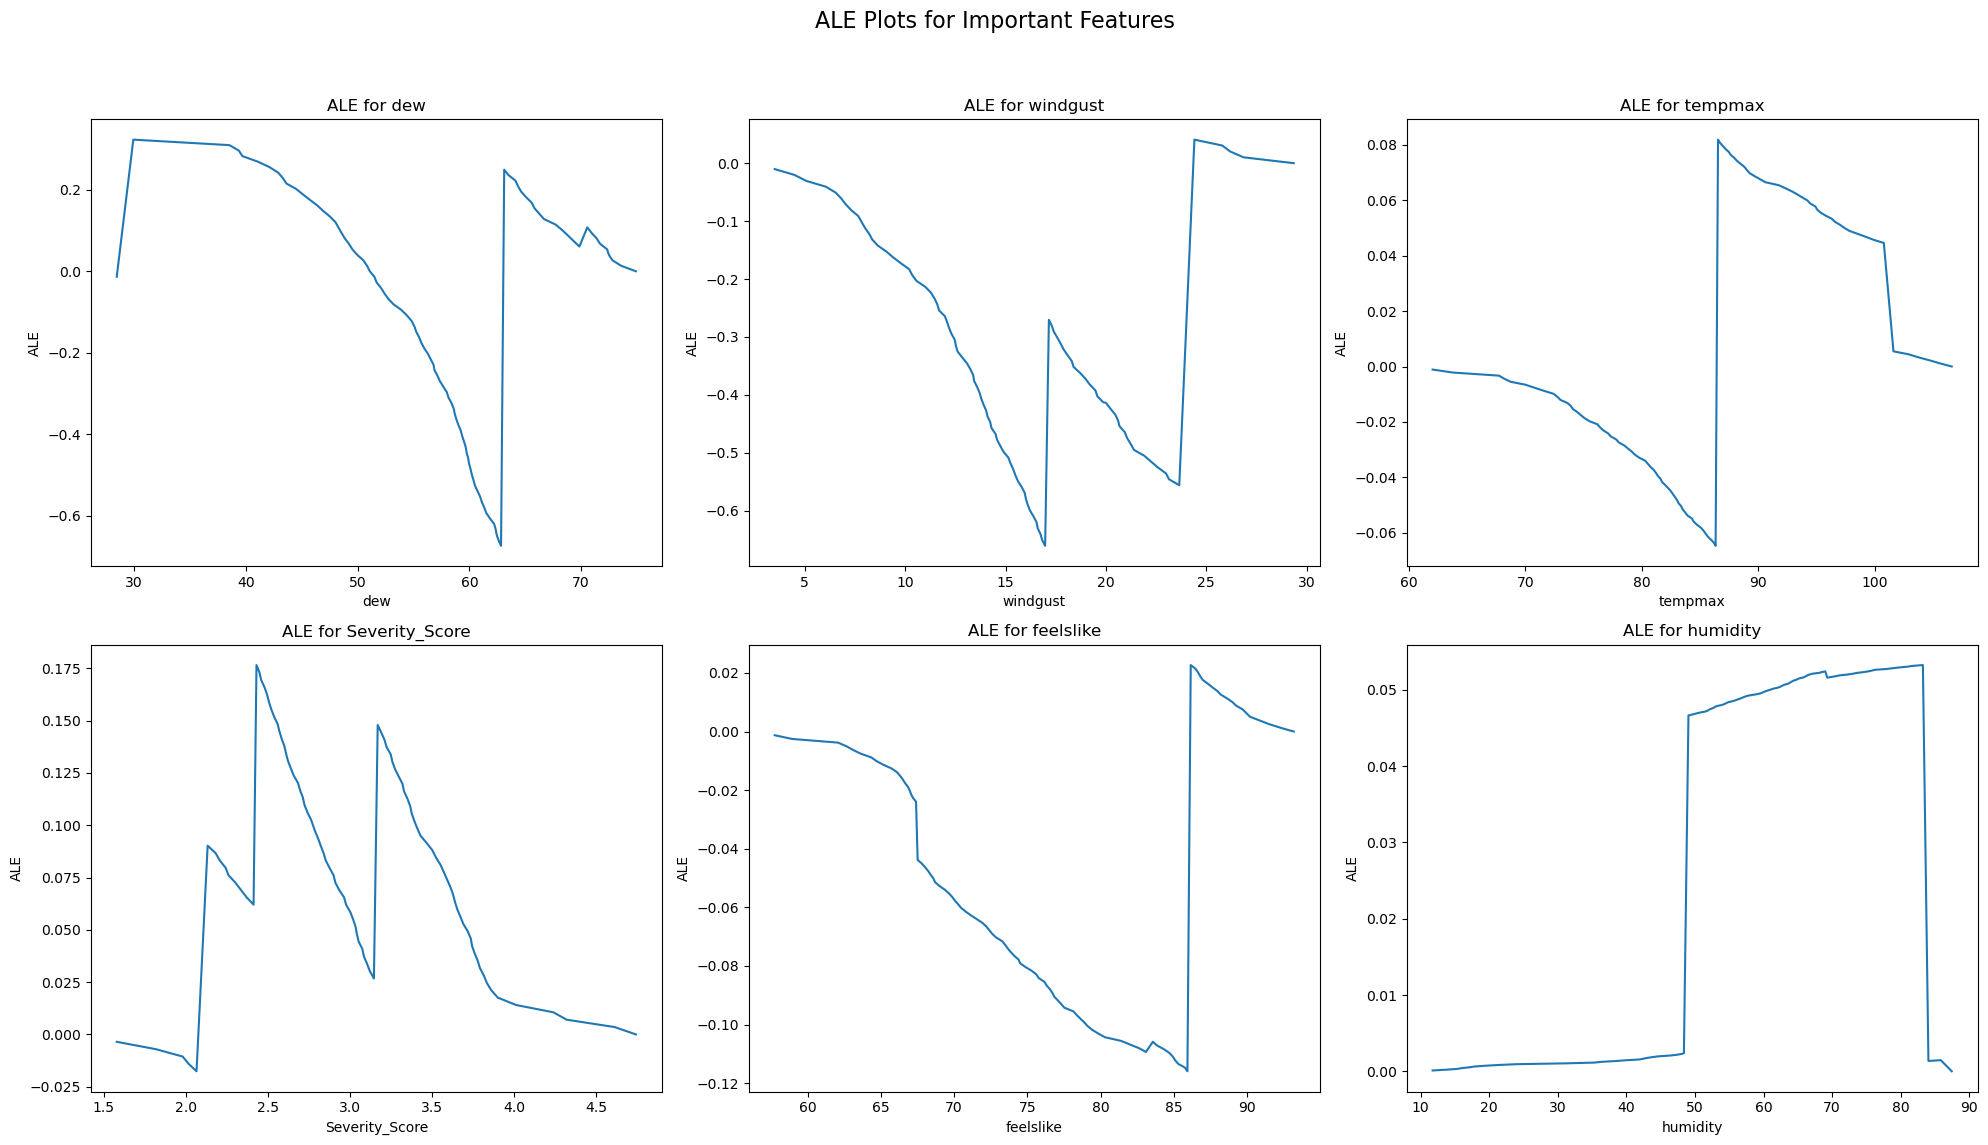

In [31]:
def plot_ale_grid(model, X, features, feature_names):
    # print information about input data and features
    print(f"Shape of X: {X.shape}")
    print(f"Number of features to plot: {len(features)}")
    print(f"Number of feature names: {len(feature_names)}")
    
    # ensure X is a numpy array without column names
    if isinstance(X, pd.DataFrame):
        X = X.values
    
    # create a mapping between feature names and column indices
    feature_to_column = {name: i for i, name in enumerate(feature_names)}
    
    # only use features that are actually in X
    valid_features = [f for f in features if feature_to_column[f] < X.shape[1]]
    print(f"Valid features: {valid_features}")
    
    # calculate grid dimensions
    n_features = len(valid_features)
    n_cols = 3
    n_rows = (n_features - 1) // n_cols + 1
    
    # create figure and axes for subplots
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 6*n_rows))
    fig.suptitle("ALE Plots for Important Features", fontsize=16)
    
    def ale_for_feature(model, X, feature):
        # get column index for the feature
        column = feature_to_column[feature]
        # sort the data by the feature
        sorted_indices = np.argsort(X[:, column])
        X_sorted = X[sorted_indices]
        
        # create intervals for the feature
        quantiles = np.linspace(0, 1, num=101)
        bins = np.quantile(X_sorted[:, column], quantiles)
        
        # calculate ALE values
        ale_values = []
        for i in range(len(bins) - 1):
            # create datasets with lower and upper bin values
            X_lower = X_sorted.copy()
            X_upper = X_sorted.copy()
            X_lower[:, column] = bins[i]
            X_upper[:, column] = bins[i+1]
            
            try:
                # predict using lower and upper datasets
                pred_lower = model.predict(X_lower)
                pred_upper = model.predict(X_upper)
            except Exception as e:
                # handle prediction errors
                print(f"Prediction error for feature {feature}: {str(e)}")
                return None, None
            
            # calculate average effect
            ale = np.mean(pred_upper - pred_lower)
            ale_values.append(ale)
        
        # center the ALE values
        ale_values = np.array(ale_values)
        ale_values = ale_values - np.mean(ale_values)
        
        # calculate cumulative sums
        ale_cumsum = np.cumsum(ale_values)
        
        return bins[:-1], ale_cumsum

    # iterate over valid features and create subplots
    for i, feature in enumerate(valid_features):
        # calculate subplot position
        row = i // n_cols
        col = i % n_cols
        ax = axes[row, col] if n_rows > 1 else axes[col]
        
        # calculate ALE values for the feature
        feature_values, ale_values = ale_for_feature(model, X, feature)
        
        # plot ALE values if calculation was successful
        if feature_values is not None and ale_values is not None:
            ax.plot(feature_values, ale_values)
            ax.set_xlabel(feature)
            ax.set_ylabel('ALE')
            ax.set_title(f'ALE for {feature}')
        else:
            # display error message if ALE calculation failed
            ax.text(0.5, 0.5, f"Error calculating ALE for {feature}", ha='center', va='center')
    
    # remove extra subplots
    if isinstance(axes, np.ndarray):
        for ax in axes.flat[n_features:]:
            ax.remove()
    elif n_features < n_cols:
        for i in range(n_features, n_cols):
            fig.delaxes(axes[i])
    
    # adjust layout and display the plot
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

# call the function to create ALE plots
plot_ale_grid(dt_model, X_train, important_features, features)

### Summary of ALE Plots for Important Features

**ALE for Dew**
The dew point shows a complex non-linear relationship with the health risk score, initially increasing the risk up to about 40, then decreasing it, with a sharp drop and recovery around 60-65.

**ALE for Windgust**
Wind gust exhibits a generally negative effect on health risk score as it increases, with a notable drop around 15-20 mph followed by a sharp increase.

**ALE for Max Tempature**
Maximum temperature has a varying effect, initially slightly decreasing the health risk score, then sharply increasing it around 85-90°F before dropping again at very high temperatures.

**ALE for Severity Score**
The Severity Score shows a fluctuating but overall positive effect on the health risk score, with several local peaks and troughs throughout its range.

**ALE for Feels Like**
The "feels like" temperature demonstrates a predominantly negative effect on health risk score as it increases, with a sharp positive spike around 85°F.

**ALE for Humidity**
Humidity has minimal effect on the health risk score at lower levels, but shows a marked increase in effect starting around 50-60%, with a sharp drop at very high humidity levels.

---
### Disscusion

PDP shows the average effect of a single feature on the models predictions, giving a general idea of how changes in that feature impact the outcome across all data points.

ICE plots go deeper by showing how the models predictions change for individual data points as a feature changes, allowing us to see if the features effect is consistent or varies widely across different instances.

ALE plots offer a more accurate view of feature impacts, especially when features are correlated, by showing how small, localized changes in a feature affect predictions on average.

Overall, PDP gives the big picture, ICE shows individual stories, and ALE provides a balanced view that works well even when features interact in complex ways, ultimatley making them great explainable methods for understanding model predictions.